In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
import cv2
import imageio
sys.path.append("../pypom")
import camera
import utils
import genpom

Extrinsics kept in 'cm'.
[[  21.40754335 -421.0213955   278.83217317]
 [  52.892714    -42.63601296  264.08042038]
 [   0.23138961   -0.19379132    1.        ]]


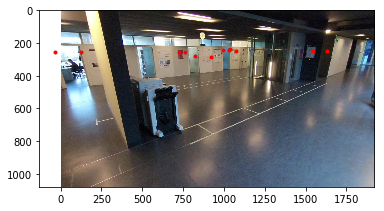

In [87]:
world_points = np.array([
    [ -372,  -134, 0],
    [ -434,  -134, 0],
    [ -434,  -853, 0],
    [ -372,  -853, 0],
    [  394, -1016, 0],
    [  394,  -922, 0],
    [  394,   158, 0],
    [  394,    64, 0],
    [   63,  -318, 0],
    [   63,  -677, 0],
    [    1,  -677, 0],
    [    1,  -318, 0]
])
world_points += np.array([0,0,180]) 

cam0 = camera.CameraKRt.from_json("intrinsics_cam0.json", "extrinsics_cam0.json", view_shape, "cm")

proj = cam0.project_points(world_points)

Hr = cv2.findHomography(world_points, proj[:,[1,0]])[0]
print(Hr)

img = utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape, msigma=None)

plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.')

Extrinsics kept in 'cm'.
[[  21.40756695 -421.02141952  278.83214022]
 [  52.89272693  -42.63601595  264.08041961]
 [   0.23138965   -0.19379133    1.        ]]
[ 144. -546.]


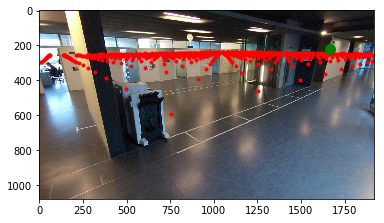

In [84]:
view_shape = (1080, 1920)

room = genpom.Room(width=1110, 
                   height=1380, 
                   step_x=50, 
                   step_y=50, 
                   origin_x=394, 
                   origin_y=204, 
                   n_cams=4)

cam0 = camera.CameraKRt.from_json("intrinsics_cam0.json", "extrinsics_cam0.json", view_shape, "cm")

world_grid = room.world_grid() + np.array([0,0,180])

img = utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape, msigma=None)

proj = cam0.project_points(world_grid)
mask1 = np.logical_and(proj[:,0]>0, proj[:,0]<1080)
mask2 = np.logical_and(proj[:,1]>0, proj[:,1]<1920)
mask = np.logical_and(mask1, mask2)
proj = proj[mask]

plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.')

np.set_printoptions(suppress=True)

Hr = cv2.findHomography(world_grid[mask], proj[:,[1,0]])[0]
print(Hr)

i=150
point = world_grid[i,:2]
print(point)
p = utils.transform_points(Hr, point)
plt.plot(p[:,1], p[:,0], 'g.', markersize=20)

In [73]:
world_grid.shape

(594, 3)

Extrinsics kept in 'cm'.
Rectangle(xmin=346, ymin=88, xmax=370,ymax=200, visible=None)


[-100, 740, 460, -100]

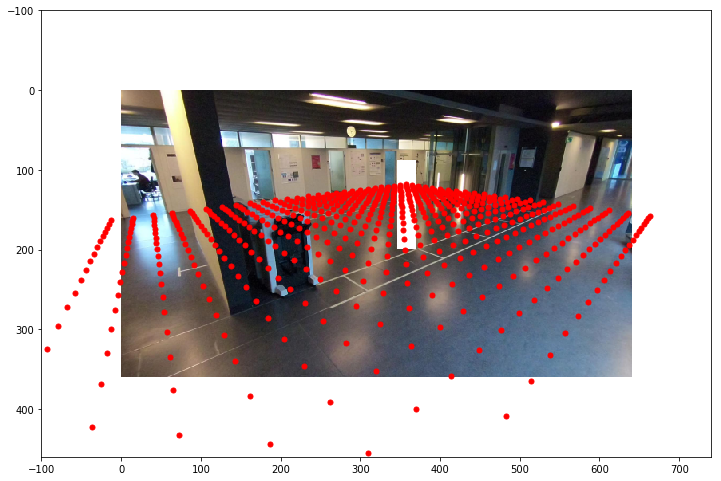

In [2]:
view_shape = (1080//3, 1920//3)

room = genpom.Room(width=1110, 
                   height=1380, 
                   step_x=50, 
                   step_y=50, 
                   origin_x=394, 
                   origin_y=204, 
                   n_cams=4)

cam0 = camera.CameraKRt.from_json("intrinsics_cam0.json", "extrinsics_cam0.json", view_shape, "cm")

world_grid = room.world_grid()
proj = cam0.project_bottom_points(world_grid)

cilinder = genpom.Cilinder(radius=16, 
                           height=180, 
                           base_center=world_grid[415])

rectangle = cilinder.project_with(cam0)
print(rectangle)

img = utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape, msigma=None)
img[rectangle.slices()] = 255

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.', markersize=10)
plt.axis([-100, view_shape[1]+100, view_shape[0]+100, -100])

Rectangle(xmin=348, ymin=92, xmax=367,ymax=198, visible=None)


[-100, 740, 460, -100]

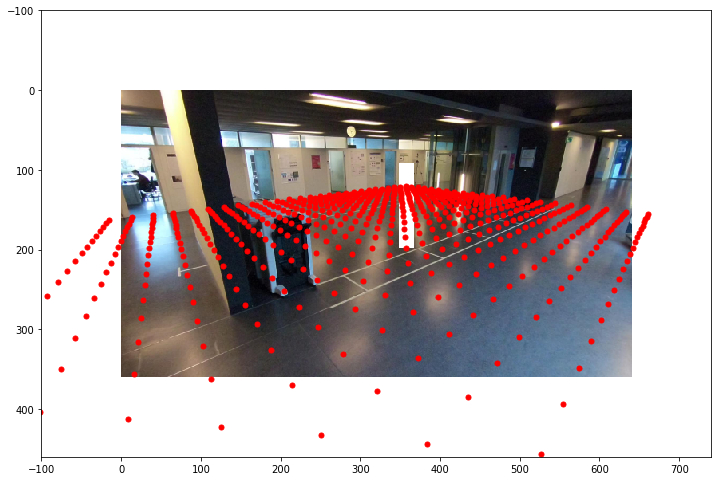

In [3]:
view_shape = (1080//3, 1920//3)

room = genpom.Room(width=1110, 
                   height=1380, 
                   step_x=50, 
                   step_y=50, 
                   origin_x=394, 
                   origin_y=204, 
                   n_cams=4)

cam0 = camera.CameraHbotHeight.from_json("homographies_bottom_head_height.json", view_shape, "cm")

world_grid = room.world_grid()
proj = cam0.project_bottom_points(world_grid)

cilinder = genpom.Cilinder(radius=16, 
                           height=180, 
                           base_center=world_grid[415])

rectangle = cilinder.project_with(cam0)
print(rectangle)

img = utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape, msigma=None)
img[rectangle.slices()] = 255

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.', markersize=10)
plt.axis([-100, view_shape[1]+100, view_shape[0]+100, -100])

Rectangle(xmin=-6359, ymin=247, xmax=1103,ymax=595, visible=None)


[-100, 2020, 1180, -100]

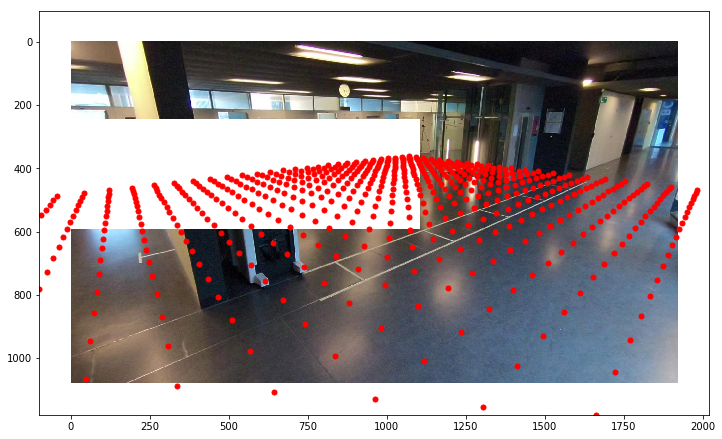

In [56]:
view_shape = (1080, 1920)

room = genpom.Room(width=1110, 
                   height=1380, 
                   step_x=50, 
                   step_y=50, 
                   origin_x=394, 
                   origin_y=204, 
                   n_cams=4)

cam0 = camera.CameraHbotHtop.from_json("homographies_bottom_top.json", view_shape, "cm")

world_grid = room.world_grid()
proj = cam0.project_bottom_points(world_grid)

cilinder = genpom.Cilinder(radius=16, 
                           height=180, 
                           base_center=world_grid[415])

rectangle = cilinder.project_with(cam0)
print(rectangle)

img = utils.downsample_image(imageio.imread("frame_cam0_undistorted.JPG"), view_shape, msigma=None)
img[rectangle.slices()] = 255

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.plot(proj[:,1], proj[:,0], 'r.', markersize=10)
plt.axis([-100, view_shape[1]+100, view_shape[0]+100, -100])

In [57]:
utils.transform_points(cam0.Htop, cilinder.top_points()[:,:2])

array([[  251.06469336, -5791.29331622],
       [  249.48841218, -5386.05448512],
       [  247.89236966, -4974.06778167],
       [  246.45776213, -4602.3782402 ],
       [  245.29237144, -4299.16936668],
       [  244.44575383, -4077.58097801],
       [  243.93155946, -3941.42840264],
       [  243.74589063, -3889.93922215],
       [  243.87873997, -3920.72266261],
       [  244.31911788, -4031.11598412],
       [  245.05499698, -4218.19288661],
       [  246.06853231, -4477.54876483],
       [  247.3263245 , -4800.79794585],
       [  248.76472716, -5171.77398053],
       [  250.27264034, -5562.04838833],
       [  251.6800907 , -5927.89623397],
       [  252.76848984, -6212.8171432 ],
       [  253.31846661, -6359.77155401],
       [  253.18972975, -6331.80434446],
       [  252.39004317, -6130.04187549],
       [  251.07978132, -5795.16244037],
       [  247.59913263, -4884.12983929]])

In [58]:
cilinder.top_points()[:,:2]

array([[-340.        , -296.        ],
       [-340.78230848, -291.05815168],
       [-343.0527331 , -286.59955959],
       [-346.58925231, -283.06022303],
       [-351.04603499, -280.78624863],
       [-355.98725877, -280.00000507],
       [-360.9297285 , -280.77837798],
       [-365.39012718, -283.04525139],
       [-368.93227884, -286.57895101],
       [-371.20980157, -291.03392145],
       [-371.99997971, -295.97451755],
       [-371.22554287, -300.91760555],
       [-368.96222211, -305.37980799],
       [-365.43134432, -308.9247725 ],
       [-360.97818895, -311.20584213],
       [-356.03822365, -311.99995434],
       [-351.09452051, -311.22945406],
       [-346.63051715, -308.9696874 ],
       [-343.08274203, -305.44163367],
       [-340.79812696, -300.99029619],
       [-340.00008117, -296.05096483],
       [-356.        , -296.        ]])

In [23]:
cam0.project_bottom_points(cilinder.bottom_points())

array([[195.94231451, 350.81916017],
       [196.76472422, 349.07145874],
       [197.77528452, 348.15382388],
       [198.88214153, 348.17564086],
       [199.97902398, 349.16133157],
       [200.95465011, 351.03797016],
       [201.70494034, 353.63298725],
       [202.14650945, 356.68615664],
       [202.22886052, 359.87716441],
       [201.94236411, 362.86556892],
       [201.31986449, 365.33566784],
       [200.43144665, 367.03682536],
       [199.37380425, 367.81128124],
       [198.25691639, 367.60562502],
       [197.1909078 , 366.46690558],
       [196.27518079, 364.52771816],
       [195.59071402, 361.98565864],
       [195.19537843, 359.08160041],
       [195.12153092, 356.07932908],
       [195.37504525, 353.24713131],
       [195.93519991, 350.84058297],
       [198.56596521, 357.91200981]])

In [30]:
cam0.project_top_points(cilinder.top_points())

array([[   83.68821868, -1930.43177644],
       [   83.16279211, -1795.35209397],
       [   82.63077846, -1658.02312364],
       [   82.15257643, -1534.12655097],
       [   81.76411327, -1433.05688097],
       [   81.48190771, -1359.19405292],
       [   81.31050977, -1313.80984215],
       [   81.24862023, -1296.64677489],
       [   81.29290331, -1306.90792586],
       [   81.4396958 , -1343.70571489],
       [   81.68498857, -1406.06470886],
       [   82.02283334, -1492.51670643],
       [   82.44209698, -1600.26648335],
       [   82.92156406, -1723.92522205],
       [   83.4242013 , -1854.01675864],
       [   83.89335098, -1975.96610708],
       [   84.25615035, -2070.93979767],
       [   84.43947577, -2119.92463008],
       [   84.39656351, -2110.60222152],
       [   84.13000155, -2043.34802619],
       [   83.69324799, -1931.72148519],
       [   82.53303291, -1628.04379469]])

In [31]:
cilinder.top_points()

array([[-340.        , -296.        ,  180.        ],
       [-340.78230848, -291.05815168,  180.        ],
       [-343.0527331 , -286.59955959,  180.        ],
       [-346.58925231, -283.06022303,  180.        ],
       [-351.04603499, -280.78624863,  180.        ],
       [-355.98725877, -280.00000507,  180.        ],
       [-360.9297285 , -280.77837798,  180.        ],
       [-365.39012718, -283.04525139,  180.        ],
       [-368.93227884, -286.57895101,  180.        ],
       [-371.20980157, -291.03392145,  180.        ],
       [-371.99997971, -295.97451755,  180.        ],
       [-371.22554287, -300.91760555,  180.        ],
       [-368.96222211, -305.37980799,  180.        ],
       [-365.43134432, -308.9247725 ,  180.        ],
       [-360.97818895, -311.20584213,  180.        ],
       [-356.03822365, -311.99995434,  180.        ],
       [-351.09452051, -311.22945406,  180.        ],
       [-346.63051715, -308.9696874 ,  180.        ],
       [-343.08274203, -305.

In [26]:
image_points_top = cam0.project_top_points(cilinder.top_points())
image_points_bot = cam0.project_bottom_points(cilinder.bottom_points())
image_points = np.vstack([image_points_bot, image_points_top])

x_proj_min = image_points[:,1].min() # (pixels)       
x_proj_max = image_points[:,1].max() # (pixels) 

c_proj_bot = image_points_bot[-1,0] # projected bottom central point (pixels)
c_proj_top = image_points_top[-1,0] # projected top central point (pixels)

# (ymin, xmin) is the top-left corner of the rectangle in the image
# (ymax, xmax) is instead the bottom-right corner of the rectangle in the image
ymin = c_proj_top 
xmin = x_proj_min
ymax = c_proj_bot
xmax = x_proj_max 

In [29]:
image_points

array([[  195.94231451,   350.81916017],
       [  196.76472422,   349.07145874],
       [  197.77528452,   348.15382388],
       [  198.88214153,   348.17564086],
       [  199.97902398,   349.16133157],
       [  200.95465011,   351.03797016],
       [  201.70494034,   353.63298725],
       [  202.14650945,   356.68615664],
       [  202.22886052,   359.87716441],
       [  201.94236411,   362.86556892],
       [  201.31986449,   365.33566784],
       [  200.43144665,   367.03682536],
       [  199.37380425,   367.81128124],
       [  198.25691639,   367.60562502],
       [  197.1909078 ,   366.46690558],
       [  196.27518079,   364.52771816],
       [  195.59071402,   361.98565864],
       [  195.19537843,   359.08160041],
       [  195.12153092,   356.07932908],
       [  195.37504525,   353.24713131],
       [  195.93519991,   350.84058297],
       [  198.56596521,   357.91200981],
       [   83.68821868, -1930.43177644],
       [   83.16279211, -1795.35209397],
       [   82.63

In [ ]:
import matplotlib.patches as patches

camera = Camera(0, rvec, tvec, K, distCoeffs=np.zeros(5))
image_points = camera.project_points(world_grid)

cil = Cilinder(MAN_RAY, MAN_HEIGHT, world_grid[8000])
proj_points = camera.project_points(cil.get_points())  

rect = Rectangle(0, i, *cil.project(camera))
#rect = rectangles[0][8000]

fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(111, aspect='equal')

xmin = rect.xmin
ymin = rect.ymin
xmax = rect.xmax
ymax = rect.ymax
'''
xmin = 812
ymin = 260
xmax = 910
ymax = 632
'''
ax1.add_patch(
    patches.Rectangle(
        (xmin, ymin), # (x,y)
        xmax-xmin,    # width
        ymax-ymin,    # height
    )
)
ax1.plot(proj_points[:,0], proj_points[:,1], 'b.', markersize=5)
ax1.plot(image_points[:,0], image_points[:,1], 'k.', markersize=1)
ax1.axis([0, 1920, 1080, 0])
ax1.grid()